In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import tempfile
import yt_dlp
import os

%matplotlib widget

In [2]:
def video_ids_spectrograms(video_ids, quiet: bool = True):
    with tempfile.TemporaryDirectory() as tempdir:
        ydl_opts = {
            'quiet': quiet,
            'format': 'bestaudio/best',
            'postprocessors': [{
                'key': 'FFmpegExtractAudio',
                'preferredcodec': 'wav'
            }],
            'outtmpl': f'{tempdir}/%(id)s.%(ext)s',
        }

        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            ydl.download([f'http://www.youtube.com/watch?v={videoId}' for videoId in video_ids])

        SONG_LEN = 240
        SR = 48000
        SAMPLE_CNT = int(SR * SONG_LEN)
        VID_LEN = len(video_ids)
        N_FFT = 4096
        HOP_LEN = 4096
        HOP_CNT = SAMPLE_CNT // HOP_LEN + 1
        N_MELS = 128
        all_samples = np.empty((VID_LEN, SAMPLE_CNT))
        all_ps_dbs = np.empty((VID_LEN, N_MELS, HOP_CNT))

        for i, video_id in enumerate(video_ids):
            samples, _ = librosa.load(f'{tempdir}/{video_id}.wav', sr=SR)

            if samples.shape[0] > SAMPLE_CNT:
                all_samples[i, :] = samples[:SAMPLE_CNT]
            else:
                all_samples[i, :samples.shape[0]] = samples
                all_samples[i, samples.shape[0]:] = 0

            all_ps_dbs[i] = librosa.feature.melspectrogram(y=all_samples[i], sr=SR, hop_length=HOP_LEN, n_mels=N_MELS, n_fft=N_FFT)
            all_ps_dbs[i] = librosa.power_to_db(all_ps_dbs[i], ref=np.max)

            all_ps_dbs[i] = (all_ps_dbs[i] - all_ps_dbs[i].min()) / (all_ps_dbs[i].max() - all_ps_dbs[i].min())

        return (all_samples, all_ps_dbs)

In [3]:
video_ids = [
    '3nQNiWdeH2Q',
    'n4tK7LYFxI0',
    'q1ULJ92aldE',
    'CYDP_8UTAus',
    'zvrMzRVtj1s',
    # 'f_zLB1CTXlQ',
    # 'uZi8_rnqgHg',
    # 'uFkzXH9t2cA',
    # 'WdKMcRQmtqU',
    # 'Z_QVKFKjpZo',
    # '3hXbjp-FcTc',
    # 'eRIoaAOGo8U',
    # 'yfxTYELfGLg',
    # 'lQcxnqGsNbs',
    # 'eV-9l9AzA6c',
    # 'cj-HnSUqx3w',
    # '9Wqz3RMW5Y0',
    # 'zZbT0OaDuJ0',
    # '5MAmis6pMig',
    # 'LFrOXa4W_WU',
    # 'Mhp2W3O_cXU',
    # 'yMoYapQkIHs',
    # 'tZYlqiGgKQ4',
    # 'f-YsVDJ9Vs8',
    # 'onKbG1Gj33c'
]
all_samples, all_ps_dbs = video_ids_spectrograms(video_ids)

In [4]:
all_ps_dbs.shape

(5, 128, 2813)

In [5]:
all_ps_dbs.nbytes

14402560

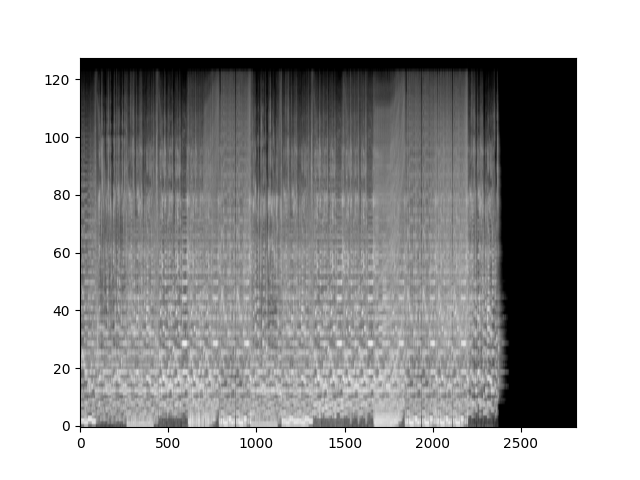

In [6]:
fig, ax = plt.subplots()
ax.imshow(all_ps_dbs[0], aspect='auto', origin='lower', cmap='gray')

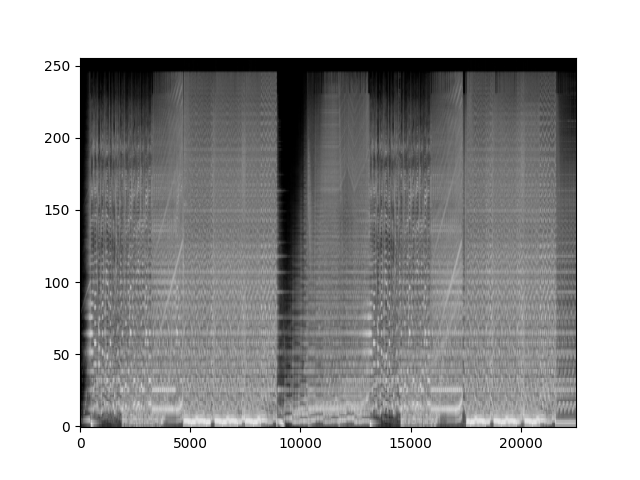

In [6]:
fig, ax = plt.subplots()
ax.imshow(all_ps_dbs[1], aspect='auto', origin='lower', cmap='gray')

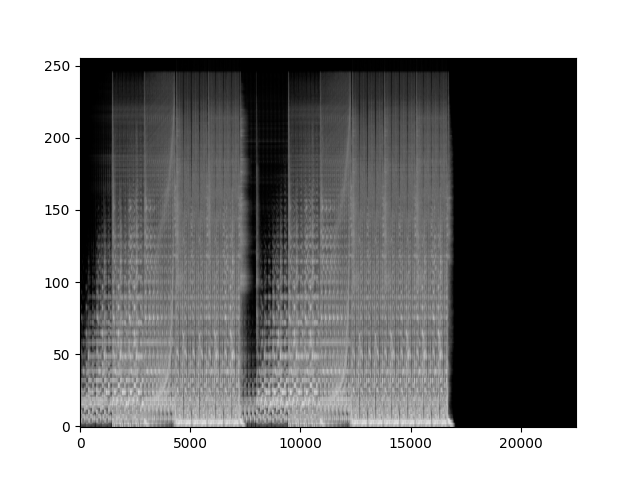

In [7]:
fig, ax = plt.subplots()
ax.imshow(all_ps_dbs[2], aspect='auto', origin='lower', cmap='gray')

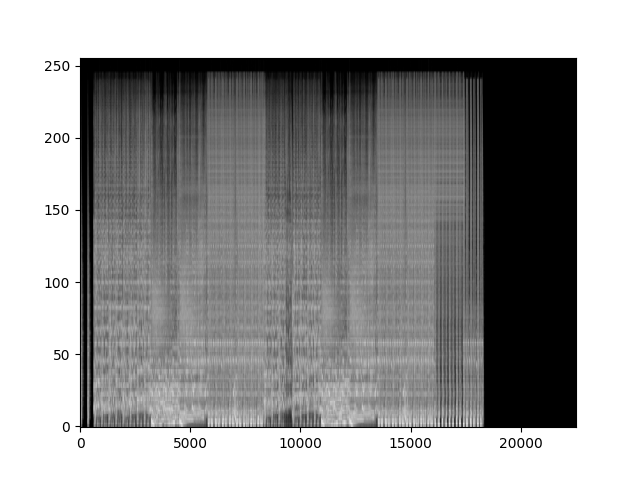

In [8]:
fig, ax = plt.subplots()
ax.imshow(all_ps_dbs[3], aspect='auto', origin='lower', cmap='gray')

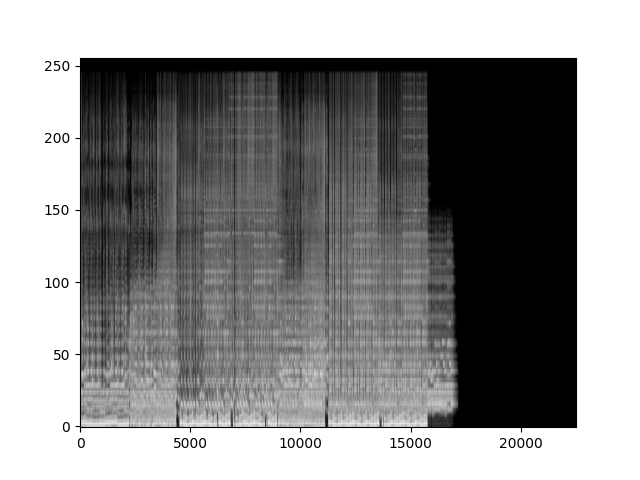

In [9]:
fig, ax = plt.subplots()
ax.imshow(all_ps_dbs[4], aspect='auto', origin='lower', cmap='gray')